In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from nltk.corpus import stopwords
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
salary = pd.read_csv("E:/DataScience/Assignments/Naive Bayes/SalaryData_Test.csv")

In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [4]:
Salary = salary['Salary']

data = salary.drop('Salary', axis=1)

In [5]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [6]:
scaler = MinMaxScaler()
data[['age','educationno','capitalgain','capitalloss','hoursperweek']] = scaler.fit_transform(data[['age','educationno','capitalgain','capitalloss','hoursperweek']])

In [7]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.109589,Private,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States
1,0.287671,Private,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States
2,0.150685,Local-gov,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States
3,0.369863,Private,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States
4,0.232877,Private,10th,0.333333,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,0.295918,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,Private,Bachelors,0.800000,Never-married,Prof-specialty,Own-child,White,Male,0.000000,0.0,0.397959,United-States
15056,0.301370,Private,Bachelors,0.800000,Divorced,Prof-specialty,Not-in-family,White,Female,0.000000,0.0,0.357143,United-States
15057,0.287671,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.000000,0.0,0.500000,United-States
15058,0.369863,Private,Bachelors,0.800000,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.054551,0.0,0.397959,United-States


In [8]:
le = preprocessing.LabelEncoder()
le.fit(Salary)
Salary=le.transform(Salary)

In [9]:
Salary

array([0, 0, 1, ..., 0, 0, 1])

In [11]:
from pandas import DataFrame
Salary = DataFrame(Salary, columns=["salary"])

In [12]:
data = pd.get_dummies(data)

In [13]:
encoded = list(data.columns)

In [14]:
encoded

['age',
 'educationno',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'maritalstatus_ Divorced',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_

In [15]:
data1 = DataFrame(encoded, columns=['Data']) 

In [16]:
data1

,Data
0,age
1,educationno
2,capitalgain
3,capitalloss
4,hoursperweek
...,...
97,native_ Thailand
98,native_ Trinadad&Tobago
99,native_ United-States
100,native_ Vietnam


In [17]:
def clean_text(text):
    text = text.lower()
    text = re.sub('_', '', text)
    text = re.sub('-','',text)
    return text
clean = lambda x: clean_text(x)

In [18]:
data1['Data'] = data1.Data.apply(clean)

In [19]:
data1.Data

0                         age
1                 educationno
2                 capitalgain
3                 capitalloss
4                hoursperweek
                ...          
97            native thailand
98     native trinadad&tobago
99        native unitedstates
100            native vietnam
101         native yugoslavia
Name: Data, Length: 102, dtype: object

In [20]:
freq = pd.Series(''.join(data1['Data']).split()).value_counts()
freq

10theducation                1
divorcedmaritalstatus        1
philippinesnative            1
execmanagerialoccupation     1
11theducation                1
                            ..
amerindianeskimorace         1
assocacdmeducation           1
greecenative                 1
perunative                   1
machineopinspctoccupation    1
Length: 98, dtype: int64

In [21]:
stop = stopwords.words('english')
data1['Data'] = data1['Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [23]:
freq = pd.Series(' '.join(data1['Data']).split()).value_counts()[:30]
freq

native             40
education          16
occupation         14
workclass           7
maritalstatus       7
relationship        6
race                5
sex                 2
ownchild            1
localgov            1
admclerical         1
10th                1
privhouseserv       1
elsalvador          1
male                1
capitalgain         1
transportmoving     1
11th                1
educationno         1
armedforces         1
iran                1
mexico              1
haiti               1
marriedafspouse     1
ireland             1
hungary             1
poland              1
sales               1
japan               1
hong                1
dtype: int64

In [24]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data1["Data"])
word_freq = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq['frequency'] = word_freq['occurrences']/np.sum(word_freq['occurrences'])

In [25]:
word_freq

,term,occurrences,frequency
0,10th,1,0.005
1,11th,1,0.005
2,12th,1,0.005
3,1st4th,1,0.005
4,5th6th,1,0.005
...,...,...,...
106,widowed,1,0.005
107,wife,1,0.005
108,withoutpay,1,0.005
109,workclass,7,0.035


In [26]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1500, max_df=0.5, smooth_idf=True)
doc_vec = vectorizer.fit_transform(data1["Data"])
names = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names)

In [27]:
df

,10th,11th,12th,1st4th,5th6th,7th8th,9th,admclerical,age,amerindianeskimo,...,trinadad,unitedstates,unmarried,vietnam,white,widowed,wife,withoutpay,workclass,yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.681813,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.932041,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.932041,0.0,0.0,0.0,0.0,0.0,0.000000


In [28]:
def get_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [29]:
top_words = get_words(data1["Data"], n=400)
top_df = pd.DataFrame(top_words)
top_df.columns=["BiGram","Freq"]
top_df

,BiGram,Freq
0,workclass federalgov,1
1,workclass localgov,1
2,workclass private,1
3,workclass selfempinc,1
4,workclass selfempnotinc,1
...,...,...
93,native trinadad,1
94,trinadad tobago,1
95,native unitedstates,1
96,native vietnam,1


[Text(0, 0, 'workclass federalgov'),
 Text(0, 0, 'workclass localgov'),
 Text(0, 0, 'workclass private'),
 Text(0, 0, 'workclass selfempinc'),
 Text(0, 0, 'workclass selfempnotinc'),
 Text(0, 0, 'workclass stategov'),
 Text(0, 0, 'workclass withoutpay'),
 Text(0, 0, 'education 10th'),
 Text(0, 0, 'education 11th'),
 Text(0, 0, 'education 12th'),
 Text(0, 0, 'education 1st4th'),
 Text(0, 0, 'education 5th6th'),
 Text(0, 0, 'education 7th8th'),
 Text(0, 0, 'education 9th'),
 Text(0, 0, 'education assocacdm'),
 Text(0, 0, 'education assocvoc'),
 Text(0, 0, 'education bachelors'),
 Text(0, 0, 'education doctorate'),
 Text(0, 0, 'education hsgrad'),
 Text(0, 0, 'education masters')]

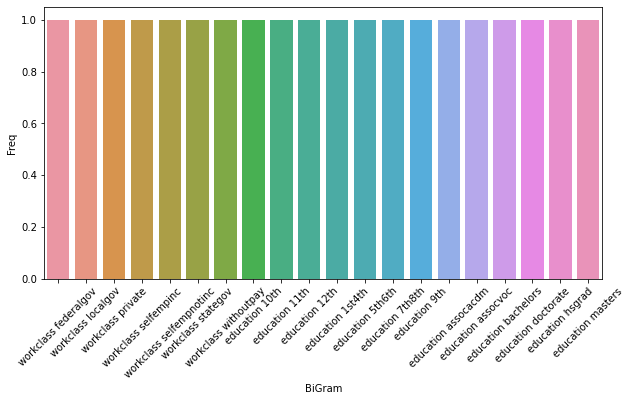

In [30]:
top_bigram = top_df.iloc[:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top_bigram["BiGram"],y=top_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top_bigram["BiGram"])

In [31]:
def get_top_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [32]:
top3_words = get_top_words(data1["Data"], n=300)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [33]:
top3_df

,Tri-gram,Freq
0,native outlyingus guamusvietc,1
1,native trinadad tobago,1


In [34]:
string = " ".join(data1["Data"])

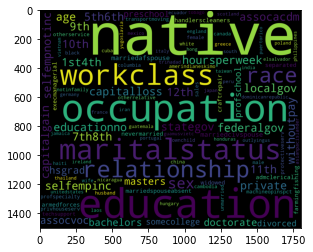

In [35]:
wordcloud = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string)
plt.imshow(wordcloud)

In [36]:
data1.head()

,Data
0,age
1,educationno
2,capitalgain
3,capitalloss
4,hoursperweek


In [37]:
Salary

,salary
0,0
1,0
2,1
3,1
4,0
...,...
15055,0
15056,0
15057,0
15058,0


In [38]:
data2 = pd.concat([data1,Salary], axis=1)

In [39]:
data2

,Data,salary
0,age,0
1,educationno,0
2,capitalgain,1
3,capitalloss,1
4,hoursperweek,0
...,...,...
15055,NaN,0
15056,NaN,0
15057,NaN,0
15058,NaN,0


In [40]:
data2=data2.dropna()

In [41]:
data2

,Data,salary
0,age,0
1,educationno,0
2,capitalgain,1
3,capitalloss,1
4,hoursperweek,0
...,...,...
97,native thailand,0
98,native trinadad&tobago,0
99,native unitedstates,0
100,native vietnam,0


In [42]:
salary_train,salary_test = train_test_split(data2,test_size=0.3)

In [43]:
salary_test

,Data,salary
32,maritalstatus nevermarried,0
81,native ireland,0
88,native outlyingus(guamusvietc),1
42,occupation otherservice,0
50,relationship notinfamily,0
3,capitalloss,1
66,native cuba,0
94,native scotland,0
75,native haiti,0
79,native india,0


In [44]:
def split_into_words(i):
    return (i.split(" "))

In [45]:
salary_bow = CountVectorizer(analyzer = split_into_words).fit(data2.Data)

In [46]:
matrix = salary_bow.transform(data2.Data)
matrix.shape

(102, 109)

In [47]:
train_matrix = salary_bow.transform(salary_train.Data)
train_matrix.shape

(71, 109)

In [48]:
test_matrix = salary_bow.transform(salary_test.Data)
test_matrix.shape

(31, 109)

In [49]:
classifier_mb = MB()
classifier_mb.fit(train_matrix,salary_train.salary)
train_pred_m = classifier_mb.predict(train_matrix)
accuracy_train_m = np.mean(train_pred_m==salary_train.salary)

test_pred_m = classifier_mb.predict(test_matrix)
accuracy_test_m = np.mean(test_pred_m==salary_test.salary)

In [50]:
classifier_gb = GB()
classifier_gb.fit(train_matrix.toarray(),salary_train.salary.values) 
train_pred_g = classifier_gb.predict(train_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==salary_train.salary)

test_pred_g = classifier_gb.predict(test_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==salary_test.salary)

In [51]:
tfidf_transformer = TfidfTransformer().fit(matrix)

train_tfidf = tfidf_transformer.transform(train_matrix)

train_tfidf.shape

test_tfidf = tfidf_transformer.transform(test_matrix)

test_tfidf.shape

(31, 109)

In [52]:
classifier_mb = MB()
classifier_mb.fit(train_matrix,salary_train.salary)
train_pred_m = classifier_mb.predict(train_matrix)
accuracy_train_m = np.mean(train_pred_m==salary_train.salary)

test_pred_m = classifier_mb.predict(test_matrix)
accuracy_test_m = np.mean(test_pred_m==salary_test.salary)

In [53]:
accuracy_train_m,accuracy_test_m

(0.8028169014084507, 0.8064516129032258)

In [54]:
classifier_gb = GB()
classifier_gb.fit(train_matrix.toarray(),salary_train.salary.values) 
train_pred_g = classifier_gb.predict(train_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==salary_train.salary)

test_pred_g = classifier_gb.predict(test_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==salary_test.salary)

In [55]:
accuracy_train_g, accuracy_test_g

(0.9859154929577465, 0.22580645161290322)

In [56]:
salary_train

,Data,salary
48,occupation transportmoving,0
96,native taiwan,0
30,maritalstatus marriedcivspouse,1
65,native columbia,0
74,native guatemala,0
...,...,...
98,native trinadad&tobago,0
18,education 9th,0
72,native germany,0
33,maritalstatus separated,0


In [57]:
salary_test

,Data,salary
32,maritalstatus nevermarried,0
81,native ireland,0
88,native outlyingus(guamusvietc),1
42,occupation otherservice,0
50,relationship notinfamily,0
3,capitalloss,1
66,native cuba,0
94,native scotland,0
75,native haiti,0
79,native india,0
